In [1]:
R.version.string

[1] "R version 4.1.3 (2022-03-10)"

In [2]:
install.packages("googledrive")
install.packages("httpuv")
install.packages("forecast")
install.packages("tsbox")
install.packages("lubridate")
install.packages("knitr")
install.packages("pracma")
install.packages("arfima")
install.packages("Metrics")
install.packages("fracdiff")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘promises’, ‘later’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘BH’, ‘anytime’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ltsa’


Installing package into ‘/usr/loc

In [3]:
library("googledrive")

# authorize google drive
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.11.0 (2021-09-26 08:30:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




In [4]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AX4XfWiC2nrehgfpFrKD9XnDFg3ZI2nuaSphtAcD_QvTELlJTFGuvmCpYY0


In [5]:
drive_file = drive_get("~/Colab Notebooks/CryptoDatasets/BitcoinTransformedClose.csv")
drive_download(drive_file)





→ Files retrieved so far: 100

→ Files retrieved so far: 200

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• BitcoinTransformedClose.csv <id: 1ucyI0dApcN-90ghPQEfFeHk0ZoPs4sFE>

Saved locally as:

• BitcoinTransformedClose.csv



In [6]:
btc_close = read.csv('/content/BitcoinTransformedClose.csv', header = T, na.string = '?')
print(head(btc_close, 10))

                  Date   Close
1  2017-10-02 23:59:59 4409.32
2  2017-10-03 23:59:59 4317.48
3  2017-10-04 23:59:59 4229.36
4  2017-10-05 23:59:59 4328.41
5  2017-10-06 23:59:59 4370.81
6  2017-10-07 23:59:59 4426.89
7  2017-10-08 23:59:59 4610.48
8  2017-10-09 23:59:59 4772.02
9  2017-10-10 23:59:59 4781.99
10 2017-10-11 23:59:59 4826.48


In [11]:
# create time series from crypto data
start_full_date <- btc_close$Date[1]
close_full_date <- btc_close$Date[length(btc_close$Date)]
start_date <- strsplit(start_full_date, " ")[[1]][1]
close_date <- strsplit(close_full_date, " ")[[1]][1]
time_seq <- seq(from = as.Date(start_date),
                to = as.Date(close_date),
                by = 1)
ts_data <- xts::xts(x = btc_close$Close, order.by = time_seq)
ts_data <- tsbox::ts_ts(ts_data)
print(head(ts_data, 10))

 [1] 4409.32 4317.48 4229.36 4328.41 4370.81 4426.89 4610.48 4772.02 4781.99
[10] 4826.48


In [12]:
# get Hurst exponent using R/S analysis
print(pracma::hurstexp(ts_data))

Simple R/S Hurst estimation:         0.8477901 
Corrected R over S Hurst exponent:   0.9823073 
Empirical Hurst exponent:            0.9760646 
Corrected empirical Hurst exponent:  0.9591622 
Theoretical Hurst exponent:          0.5359434 
$Hs
[1] 0.8477901

$Hrs
[1] 0.9823073

$He
[1] 0.9760646

$Hal
[1] 0.9591622

$Ht
[1] 0.5359434



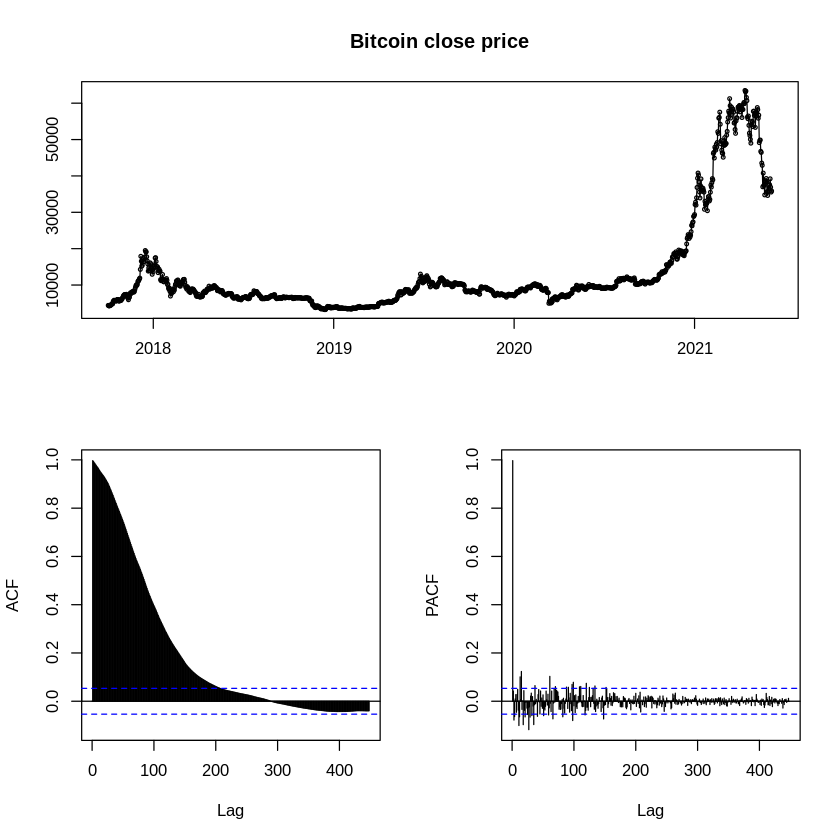

In [14]:
train <- head(ts_data, -30)
# train <- tail(head(ts_data, -30), 500)
test <- tail(ts_data, 30)
forecast::tsdisplay(train, main = "Bitcoin close price")

In [23]:
horizon <- 30

# time measuring of auto arfima modeling and forecasting
start_time <- Sys.time()

model <- forecast::arfima(train)
print(summary(model))
forecasted_out <- forecast::forecast(model, level = c(95), h = horizon)

end_time <- Sys.time()
time_taken <- end_time - start_time

cat("\n")
print(time_taken)


Call:
  forecast::arfima(y = train) 

Coefficients:
         Estimate Std. Error z value Pr(>|z|)    
d       0.4994476  0.0007814 639.196  < 2e-16 ***
ma.ma1 -0.5573083  0.0267570 -20.828  < 2e-16 ***
ma.ma2 -0.5177546  0.0267862 -19.329  < 2e-16 ***
ma.ma3 -0.4390075  0.0305366 -14.376  < 2e-16 ***
ma.ma4 -0.3638882  0.0292485 -12.441  < 2e-16 ***
ma.ma5 -0.2358122  0.0292831  -8.053 8.09e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
sigma[eps] = 931.481 
[d.tol = 0.0001221, M = 100, h = 0.000117]
Log likelihood: -1.11e+04 ==> AIC = 22212.28 [7 deg.freedom]

Time difference of 0.5191572 secs


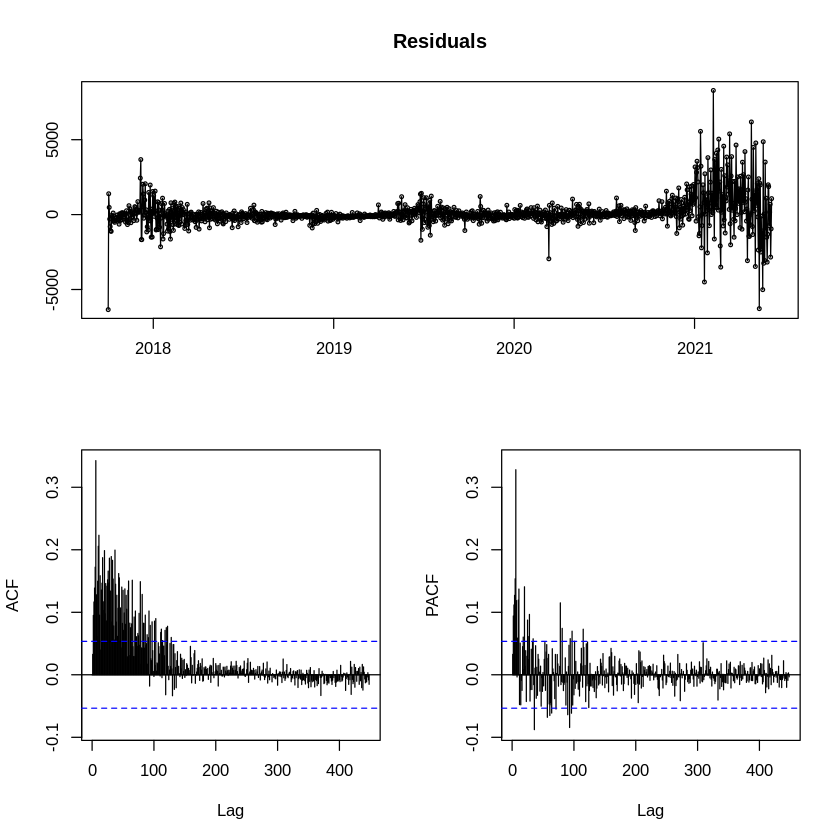

In [24]:
forecast::tsdisplay(model$residuals, main = "Residuals")

NULL

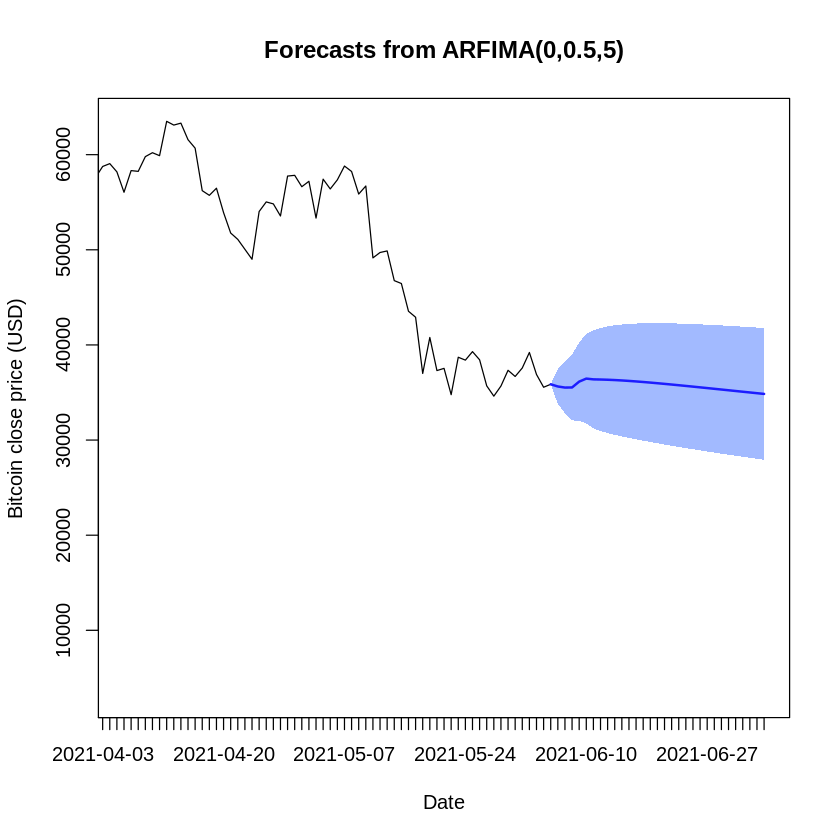

In [16]:
forecasted_dates_numeric <- as.numeric(row.names(as.data.frame(forecasted_out)))

par(c(1, 1))
plot(forecasted_out,
     xaxt = "n",
     xlab = "Date",
     ylab = "Bitcoin close price (USD)",
     xlim = c(time(train)[length(train) - 60],
            forecasted_dates_numeric[length(forecasted_dates_numeric)]),
    #  main = "ARFIMA model predictions",
     showgap = FALSE,
     shadecols = "#205bff6a",
     fcol = "#1d1dff")
axis(1,
     time(ts_data),
     format(lubridate::date_decimal(as.numeric(time(ts_data))), "%Y-%m-%d"))

In [17]:
# export forecasted values to csv file
forecasted_values <- forecasted_out[2]$mean
forecasted_dates <- format(lubridate::date_decimal(forecasted_dates_numeric),
                    "%Y-%m-%d")

forecasted_df <- data.frame(Date = forecasted_dates, Close = forecasted_values)
write.csv(forecasted_df,
          '/content/BitcoinForecasted.csv',
          row.names = FALSE,
          quote = FALSE)

In [20]:
drive_upload('/content/BitcoinForecasted.csv', "~/Colab Notebooks/CryptoDatasets/BitcoinForecasted.csv")

Local file:

• /content/BitcoinForecasted.csv

Uploaded into Drive file:

• BitcoinForecasted.csv <id: 1PRHZG2ApU6y8aUZkwWir_NgxklZQCHSa>

With MIME type:

• text/csv



In [21]:
print(forecast::arimaorder(model))
print("ARFIMA accuracy: ")
print(forecast::accuracy(forecasted_out, test))

        p         d         q 
0.0000000 0.4994476 5.0000000 
[1] "ARFIMA accuracy: "
                     ME      RMSE      MAE        MPE     MAPE       MASE
Training set   85.84639  943.6898  475.188 -0.6076619 3.493281 0.04886748
Test set     -440.91148 2109.5027 1683.757 -1.6172551 4.810941 0.17315456
                   ACF1 Theil's U
Training set 0.03262341        NA
Test set     0.65305226  1.217697


In [25]:
# auto arima modelling and forecasting
model_arima <- forecast::auto.arima(train)
forecasted_arima_out <- forecast::forecast(model_arima,
                                  level = c(95),
                                  h = horizon)

print(forecast::arimaorder(model_arima))
print("ARIMA accuracy: ")
print(forecast::accuracy(forecasted_arima_out, test))

p d q 
0 1 2 
[1] "ARIMA accuracy: "
                     ME      RMSE       MAE         MPE     MAPE       MASE
Training set   22.59201  830.3997  406.0056  0.06375392 2.778996 0.04175289
Test set     -412.72063 2317.5977 1881.0453 -1.58098527 5.349574 0.19344332
                    ACF1 Theil's U
Training set 0.002773838        NA
Test set     0.712336670  1.328687


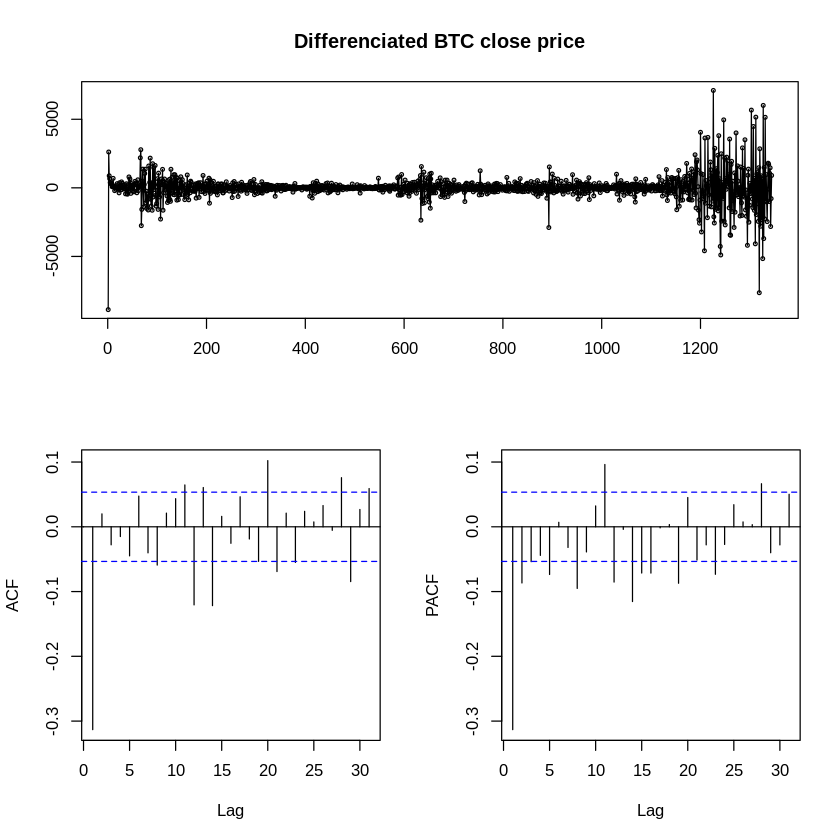

In [26]:
# manually fitted arfima modeling and forecasting
m_gph <- fracdiff::fdGPH(train)
diff_train <- fracdiff::diffseries(train, d = m_gph$d)
forecast::tsdisplay(diff_train, main = "Differenciated BTC close price")

In [27]:
# from acf and pacf plots get significant spikes
ar_params <- c(0, 1, 2, 3, 4, 5, 6)
ma_params <- c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

# find best arfima model from input quantity of ar and ma parameters
find_best_arfima_model <- function(ar_params, ma_params, train) {
    min_mse <- Inf
    return_params <- c(0, 0, 0)

    for (ar in ar_params) {
        for(ma in ma_params) {
            d_test <- fracdiff::fracdiff(train, nar = ar, nma = ma)$d
            model_arfima_test <- arfima::arfima(train,
                                    order = c(ar, ma, d_test),
                                    numeach = c(1, 1))
            forecasted_arfima_test <- predict(model_arfima_test,
                                    n.ahead = 30)
            forecasted_arfima_test_vals <- forecasted_arfima_test[[1]]$Forecast
            test_mse <- Metrics::rmse(test, forecasted_arfima_test_vals)

            if (min_mse > test_mse) {
                min_mse <- test_mse
                return_params <- c(ar, ma, d_test)
            }
        }
    }

    return(return_params)
}

oldw <- getOption("warn")
options(warn = -1)
param_vec <- (find_best_arfima_model(ar_params, ma_params, train))
options(warn = oldw)

Note: only one starting point.  Only one mode can be found -- this is now the default behavior.
Beginning the fits with 1 starting values.

Note: only one starting point.  Only one mode can be found -- this is now the default behavior.
Beginning the fits with 1 starting values.

Note: only one starting point.  Only one mode can be found -- this is now the default behavior.
Beginning the fits with 1 starting values.

Note: only one starting point.  Only one mode can be found -- this is now the default behavior.
Beginning the fits with 1 starting values.

Note: only one starting point.  Only one mode can be found -- this is now the default behavior.
Beginning the fits with 1 starting values.

Note: only one starting point.  Only one mode can be found -- this is now the default behavior.
Beginning the fits with 1 starting values.

Note: only one starting point.  Only one mode can be found -- this is now the default behavior.
Beginning the fits with 1 starting values.

Note: only one start

Warning message in arfima::arfima(train, order = c(ar_param, ma_param, d_param), :
“In the fixed argument:
 length theta is 0 but q = 0.100520411839208 unfixing theta”


Note: only one starting point.  Only one mode can be found -- this is now the default behavior.
Beginning the fits with 1 starting values.



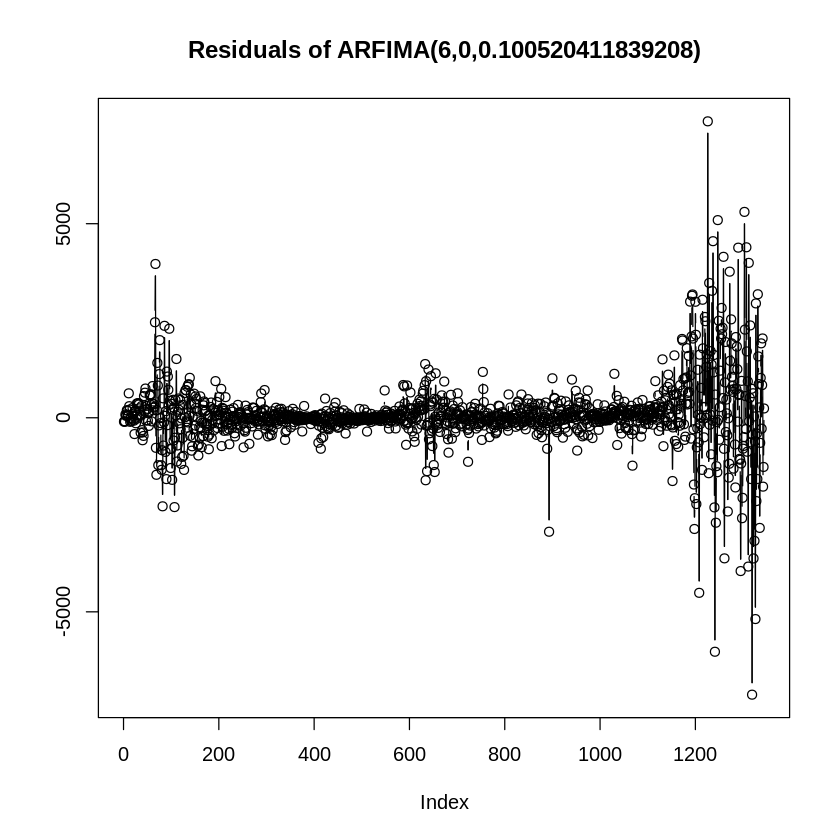

In [40]:
ar_param <- param_vec[1]
ma_param <- param_vec[2]
d_param <- param_vec[3]

model_arfima_man <- arfima::arfima(train,
                                   order = c(ar_param, ma_param, d_param),
                                   numeach = c(1, 1))
forecasted_arfima_man_out <- predict(model_arfima_man,
                                     n.ahead = 30)

plot(residuals(model_arfima_man)[[1]],
               ylab = "",
               type = "b",
                main = paste0("Residuals of ARFIMA(",
                 ar_param, ",", ma_param, ",", d_param, ")"))

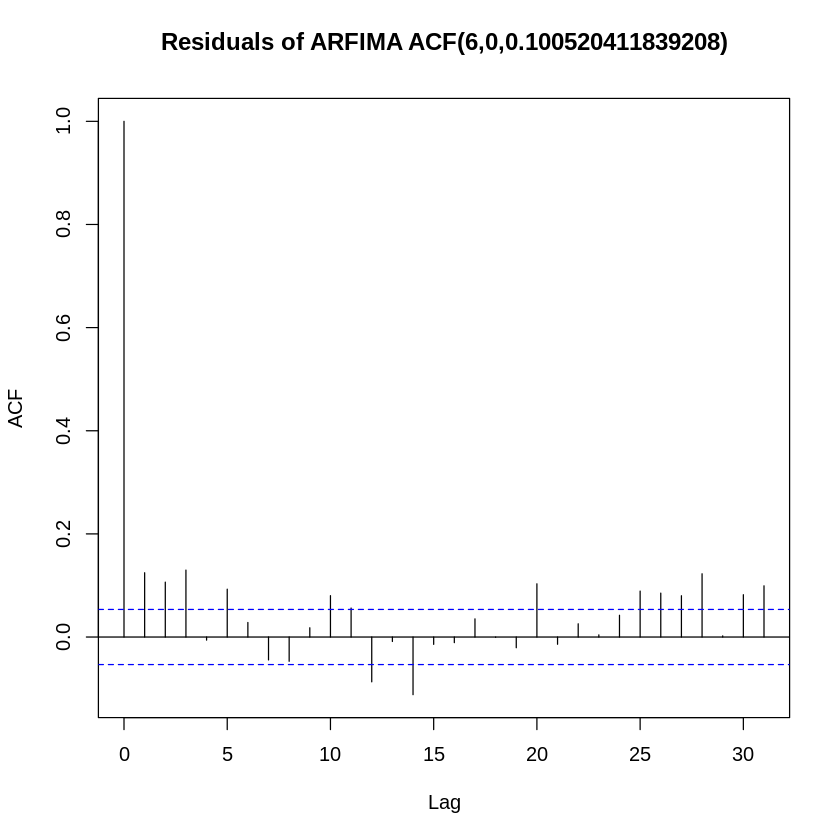

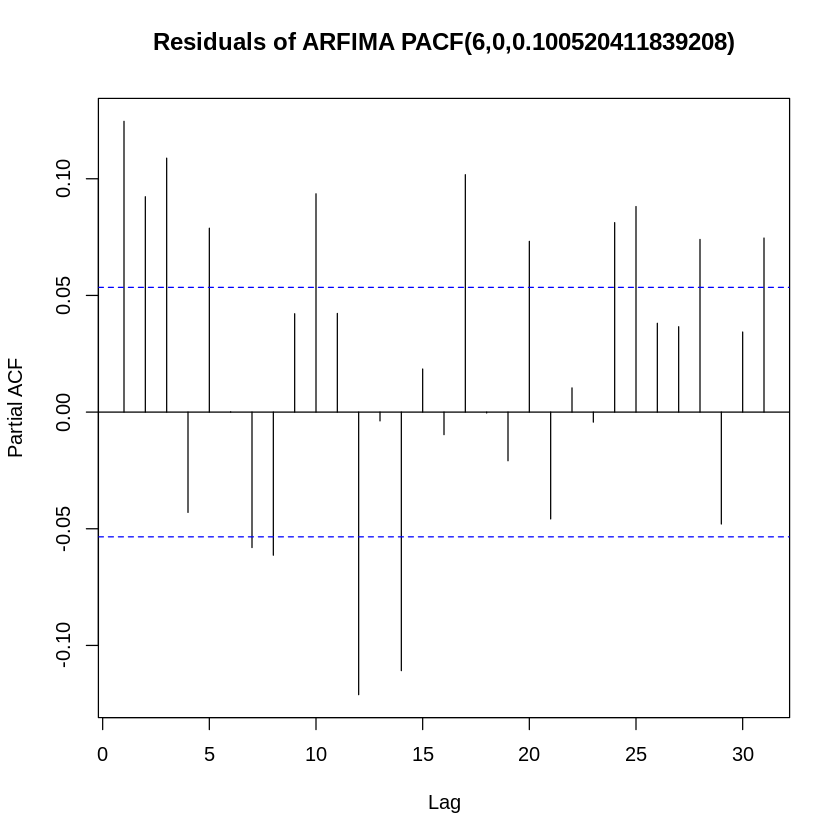

In [42]:
acf(residuals(model_arfima_man)[[1]],
 main = paste0("Residuals of ARFIMA ACF(", ar_param, ",", ma_param, ",", d_param, ")"))
pacf(residuals(model_arfima_man)[[1]],
 main = paste0("Residuals of ARFIMA PACF(", ar_param, ",", ma_param, ",", d_param, ")"))

In [43]:
forecasted_arfima_man_values <- forecasted_arfima_man_out[[1]]$Forecast

print("p d q")
print(paste(ar_param, d_param, ma_param))
print("ARFIMA manually fitted accuracy: ")
cat("\n")
print(paste0("Test set RMSE: ",
             Metrics::rmse(test, forecasted_arfima_man_values)))
print(paste0("Test set MAPE (%): ",
             Metrics::mape(test, forecasted_arfima_man_values) * 100))

[1] "p d q"
[1] "6 0.100520411839208 0"
[1] "ARFIMA manually fitted accuracy: "

[1] "Test set RMSE: 2140.78197998563"
[1] "Test set MAPE (%): 4.52599065132843"


In [44]:
# models comparison using AIC statistics
print(knitr::kable(AIC(model, model_arima, model_arfima_man)))

Warning message in AIC.default(model, model_arima, model_arfima_man):
“models are not all fitted to the same number of observations”




|                 | df|      AIC|
|:----------------|--:|--------:|
|model            |  7| 22212.28|
|model_arima      |  3| 21873.33|
|model_arfima_man | 10| 18178.17|
